# How to Load, Visualize, and Explore a Multivariate Multistep Time Series Dataset

Source: [Machine Learning Mastery](https://machinelearningmastery.com/how-to-load-visualize-and-explore-a-complex-multivariate-multistep-time-series-forecasting-dataset/)

## Problem Description

bla bla

## Load Packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
dataset = pd.read_csv('Datasets/dsg-hackathon/TrainingData.csv', header=0)

In [3]:
# trim and transform to floats
values = dataset.values
data = values[:, 6:].astype('float32')

In [7]:
# summarize amount of missing data
total_missing = np.count_nonzero(np.isnan(data))
percent_missing = total_missing / data.size * 100
print('Total Missing: %d/%d (%.1f%%)' % (total_missing, data.size, percent_missing))

Total Missing: 1922092/3366069 (57.1%)


## Chunk Data Structure

Total Chunks: 208


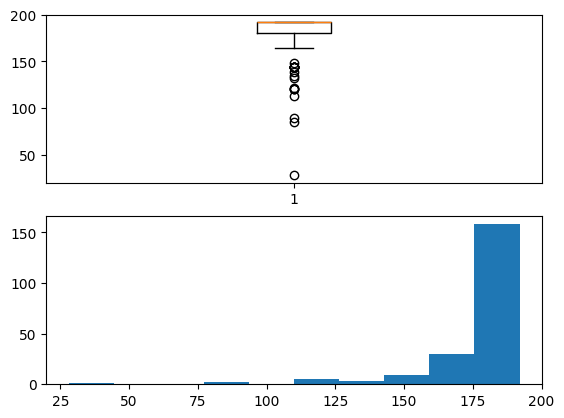

In [14]:
# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = np.unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# plot distribution of chunk durations
def plot_chunk_durations(chunks):
	# chunk durations in hours
	chunk_durations = [len(v) for k,v in chunks.items()]
	# boxplot
	plt.subplot(2, 1, 1)
	plt.boxplot(chunk_durations)
	# histogram
	plt.subplot(2, 1, 2)
	plt.hist(chunk_durations)
	# histogram
	plt.show()

# group data by chunks
values = dataset.values
chunks = to_chunks(values)
print('Total Chunks: %d' % len(chunks))
# plot chunk durations
plot_chunk_durations(chunks)